In [0]:
%matplotlib inline
import numpy as np

from random import randint, random, uniform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


(0) El más apto 142114.5851243548

(1) El más apto 0.0

(2) El más apto 284884.75084659224

(3) El más apto 90603.16675446843

(4) El más apto 90603.16675446843

(5) El más apto 0.0

(6) El más apto 5813.974507073265

(7) El más apto 86854.0802612156

(8) El más apto 92668.05476828887

(9) El más apto 52325.7705636599

[142114.5851243548, [2.9607843137254903, -1.2745098039215685, -1.4705882352941178]]
[0.0, [3.0, -5.0, 1.0]]
[284884.75084659224, [3.0, -5.0, 0.4509803921568629]]
[90603.16675446843, [3.0392156862745097, 5.0, -1.0392156862745097]]
[90603.16675446843, [3.0392156862745097, 5.0, -1.0392156862745097]]
[0.0, [3.0, -5.0, 1.0]]
[5813.974507073265, [3.0, 5.0, -0.9215686274509807]]
[86854.0802612156, [2.9607843137254903, 5.0, -1.0]]
[92668.05476828887, [2.9607843137254903, 5.0, -0.9215686274509807]]
[52325.7705636599, [3.0, -5.0, 1.2352941176470589]]


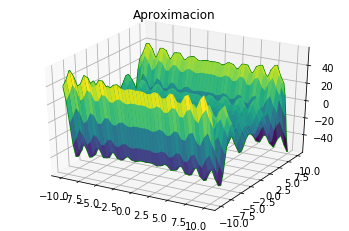

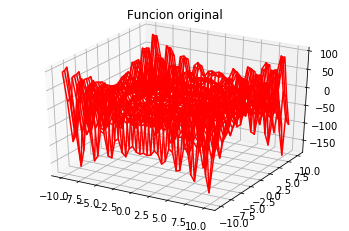

In [0]:

class genetics:

    def __init__(self, population = 5000, bit_size = 24, min_range = -10, max_range = 10.0, number_points = 41, number_coeficients = 3, selection = "tourna", function = 1):
        
        self.function = function
        self.population = np.random.randint(2, size = (population, bit_size))
        self.number_coeficients = number_coeficients
        self.bit_size = bit_size
        self.best_specie_generation = []
        self.generate_data_3D(min_range, max_range, number_points, 3.0, -5.0, 1.0)
        self.coeficients = None
        self.population_size = population
        self.selection_function = {"wheel" : self.roulette_wheel_selection, 
                                    "tourna" : self.tournament_selection,
                                    "rank" : self.rank_selection  }[ selection ]
        
        
        
    
    def roulette_wheel_selection(self):
        
        fitness = sum(self.aptitudes)
        
        roulete = uniform(0,fitness)
        pointer = 0
        
        for index,aptitude in enumerate(self.aptitudes):
            
            pointer += aptitude
            
            if roulete <= pointer:
                return index
            
        
    def tournament_selection(self, index_array):

        new_population = []
        half_population = self.population.shape[0] // 2
        for i in range(half_population):
            a=[]
            b=[]
            for j in range(0,3):
                a.append(index_array[ int(np.random.uniform()*(half_population-2))])
                b.append(index_array[ int(np.random.uniform()*(half_population-2))])
            a.sort()
            b.sort()
            #print a,b
            ib=0
            while a[0]==b[ib]:
                ib=ib+1
                if ib>2:
                    ib=0
                    a=[]
                    b=[]
                    for j in range(0,3):
                        a.append(index_array[ int(np.random.uniform()*(half_population-2))])
                        b.append(index_array[ int(np.random.uniform()*(half_population-2))])
                    a.sort()
                    b.sort()
            position_1 = index_array[ a[0]]
            position_2 = index_array[ b[ib]]
            position = int(np.random.uniform()*(self.bit_size-3)+2) - 1
            part1 =  self.population[position_1, 0:(position)] 
            part2 =  self.population[position_2, position:self.bit_size]
            parta = self.population[position_2, 0:(position)] 
            partb = self.population[position_1, position:self.bit_size]
            new_specie_1 = np.concatenate([part1, part2])
            new_specie_2 = np.concatenate([parta, partb])
            new_population.append(new_specie_1)
            new_population.append(new_specie_2)
            
        return np.array(new_population)

            
        
    def rank_selection(self):

        fitness = sum(self.aptitudes)
        
        roulete = uniform(0,fitness)
        pointer = 0
        
        for index,aptitude in enumerate(self.aptitudes):
            
            pointer += uniform(0,fitness//2)
            
            if roulete <= pointer:
                return index
        
        
        
    def generate_data_3D(self, min_range, max_range, number_points, a, b, c ):

        self.x = np.linspace(min_range, max_range, number_points)
        self.y = np.copy(self.x)
        X,Y = np.meshgrid(self.x,self.y)
        self.x = X
        self.y = Y
        

        if self.function == 1:
            self.z = self.x * np.sin(self.x * a) + b * self.y * np.cos(c * self.y)

        elif self.function == 2:
            self.z = self.y*self.x*np.sin(a*self.x) - c*self.y*np.tan(b*self.y)
        else:
            self.z = self.x*self.x*a*self.x+self.y*c + b*self.y*self.y

      
        
        
        

    def generate_population(self, partitions, a, b, generations, cross='uni'):
        
        
        
        for generation in range(generations):
            
            self.generate_aptitude(partitions,a,b)
            
            index_array =  np.argsort(self.aptitudes)
            
            aptitude = self.aptitudes[ np.argmin(self.aptitudes) ]

            print(f'({generation}) El más apto {aptitude}\n')
            self.best_specie_generation.append([aptitude, self.coeficients[np.argmin(self.aptitudes) ]])
            
            
            if cross == 'uni':
                new_population = self.one_point_crossover(index_array)
            elif cross == 'multi':
                new_population = self.multi_point_crossover(index_array)
            elif cross == 'random':
                new_population = self.random_crossover(index_array)
            else:
                new_population = self.tournament_selection(index_array)
            
            self.mutation(new_population)
            
            
            self.population = new_population
            

            
    def plot_result(self):
        
        
        
        
        index_array =  np.argsort(self.aptitudes)
        fig = plt.figure(1)
        
        
        a,b,c = self.coeficients[index_array[ 0 ] ]
        Z = self.x*np.sin(a*self.x) + b*self.y*np.cos(c*self.y)
        ax = plt.axes(projection='3d')
        ax.set_title('Aproximacion')
        ax.plot_wireframe(self.x, self.y, Z, color='green')
        
       
        ax.plot_surface(self.x, self.y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

        fig = plt.figure(0)
        ax = plt.axes(projection='3d')
        ax.set_title('Funcion original')
        
        ax.plot_wireframe(self.x, self.y, self.z, color='red')
        plt.show()

    

    
    def mutation(self,  new_population):
        probability_mutation = 0.8
        

        for i in range(self.population_size):
            probability = random()

            if probability_mutation < probability:
                
                position = int(np.random.uniform()*(self.bit_size-1))
                
                new_population[i][ position] ^= 1 
        

    def one_point_crossover(self,index_array):
        
        half_population = self.population.shape[0] // 2
        new_population = []

        for _ in range(half_population):
          selected_specie_1 = self.selection_function()

          selected_specie_2 = self.selection_function()

          position = randint(2,self.bit_size-4)
          temp = np.concatenate((self.population[selected_specie_1][:position] , self.population[selected_specie_2][position:]))
          new_population.append( temp )

          temp = np.concatenate((self.population[selected_specie_2][:position],self.population[selected_specie_1][position:]))
          new_population.append( temp )
        
        
        
        
        return np.array(new_population)
    
    def random_crossover(self,index_array):

        half_population = self.population.shape[0] // 2
        new_population = []

        for _ in range(half_population):
            selected_specie_1 = index_array[ int(np.random.uniform()*(half_population-2))]

            selected_specie_2 = index_array[ int(np.random.uniform()*(half_population-2))]

            position = int(np.random.uniform()*(self.bit_size-3)+2) - 1
            temp = np.concatenate((self.population[selected_specie_1][:position] , self.population[selected_specie_2][position:]))
            new_population.append( temp )

            temp = np.concatenate((self.population[selected_specie_2][:position],self.population[selected_specie_1][position:]))
            new_population.append( temp )
        
        
        return np.array(new_population)


    def multi_point_crossover(self,index_array):
        
        half_population = self.population.shape[0] // 2
        new_population = []

        for _ in range(half_population):
            selected_specie_1 = self.selection_function()

            selected_specie_2 = self.selection_function()

            position1 = randint(2,self.bit_size-8)
            position2 = randint(position1+4,self.bit_size-4)
                
            temp = np.concatenate(( self.population[selected_specie_1][:position1], 
                                    self.population[selected_specie_2][position1:position2],
                                    self.population[selected_specie_1][position2:]))
            new_population.append( temp )

            temp = np.concatenate((self.population[selected_specie_2][:position1], 
                                    self.population[selected_specie_1][position1:position2],
                                    self.population[selected_specie_2][position2:]))
            new_population.append( temp )
        
        
        new_population = np.array(new_population)
        
        return new_population
 
    def uniform_crossover(self,index_array):
        
        half_population = self.population.shape[0] // 2
        new_population = []

        for _ in range(half_population):
          selected_specie_1 = self.selection_function()

          selected_specie_2 = self.selection_function()

          new_specie_1 = []
          new_specie_2 = []
          index = 0
          flag = 0
          while index < self.bit_size:
            
            if flag:
                new_specie_1 += list(self.population[selected_specie_2][index:index+2])
                new_specie_2 += list(self.population[selected_specie_1][index:index+2])
                index += 2
                flag = 0
            else:
                new_specie_1 += list(self.population[selected_specie_2][index:index+1])
                new_specie_2 += list(self.population[selected_specie_1][index:index+1])
                index += 1
                flag = 1
                      
          new_population.append( new_specie_1 )
          new_population.append( new_specie_2 )
        
        
        new_population = np.array(new_population)
        
        return new_population
        
        
    
    def generate_aptitude(self, partitions, a, b):
        #rows, columns = self.population.shape

        self.aptitudes = []
        self.coeficients = []
        kbits = self.bit_size // partitions
        #range_values = np.linspace(a,b, 2**kbits-1)

        for row in self.population:
            
            temp = []

            for col in range(0, self.bit_size, kbits):

                slice_row = row[col : col + kbits]

                value = slice_row.dot(2**np.arange(slice_row.size))
                range_ = b  - a;
                increment =  float((range_*1.0) / (2.0**kbits -1))
                value = a + increment*value
                temp.append( value )

            

            self.coeficients.append( temp )
            
            #  zcal = x.*sin(a*x) + b*y.*cos(c*y);
            if self.function == 1:
                z_aproximation = self.x * np.sin(self.x * temp[0]) + temp[1] * self.y * np.cos(temp[2] * self.y)

            elif self.function == 2:
                z_aproximation = self.y*self.x*np.sin(temp[0]*self.x) - temp[2]*self.y*np.tan(temp[1]*self.y)
            else:
                z_aproximation = self.x*self.x*temp[0]*self.x+self.y*temp[2] + temp[1]*self.y*self.y
            #x*np.sin(a*x) + b*y*np.cos(c*y)

            error = sum(sum((self.z - z_aproximation)**2))

            self.aptitudes.append( error )

            

        


        

        
genetics_object = genetics(selection ='rank', function=2)
# uni multi
genetics_object.generate_population(3,-5,5, 10,'random')
for i in genetics_object.best_specie_generation:
    print(i)

genetics_object.plot_result()





 